# Información mutua 

Ejemplo de información mutua de secuencias biológicas.

In [5]:
seq ='TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCAACCCTAACCCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTCGCGGTACCCTCAGCCGGCCCGCCCGCCCGGG'
len(seq)

500

In [ ]:
# Hacer un método que tome k posociones de seq y formen los pares con la seq original
def ventana(seq1, seq2, k):
    ...
    
subseq = seq[:10]
ventana(subseq, seq, 4)

# debería regresar
# (TAACCCTAAC, CCTAACCCTA)

In [6]:
chr1 = []
f = open('secuencias/chr1_500l.fasta','r')
for line in f:
    chr1 += [x for x in line if x in 'ACGT']
f.close()
len(chr1)
# bajar chr 7, chr10 H. sapiens

24934

In [7]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
from collections     import Counter
from matplotlib import pyplot as plt

import numpy as np

# también pueden usar colab 

### Implementación propia

In [8]:
def genera_conjuntos(seq, k, M=None):
    """
    genera los conjuntos para evaluar la información mutua
    seq: iterable con símbolos
    k: corrimiento
    M: tamaño de la ventana. Si es None entonces se toma una tercera parte de seq
    """
    if(M is None):
        M = int(len(seq)/3)
        
    C = []
    X, Y = [], []
    v = seq[:M]
    for x, y in zip(v, seq[k:k+M]):
        C.append((x,y))
        X.append(x)
        Y.append(y)
    return C, X, Y

def entropia(X, base=2):
    """
    Calcula la entropia en lista X
    X: iterable con símbolos 
    """
    conteo = Counter(X)
    T = np.sum(list(conteo.values()))
    P = {}
    for simbolo in conteo:
        P[simbolo] = conteo[simbolo] / T
    
    H = 0.0
    for val in P:
        H += np.log(P[val]) * P[val]
    return -H/np.log(base)

def conjunta(C, X, Y, base=2):
    """
    Calcula la entropía conjunta de C tomando 
    los símbolos en X e Y
    C es un iterable con tuplas
    X: set con lista de simbolos
    Y: set con lista de símbolos
    """
    Xsimb, Ysimb = X, Y
    l = list([(x,y) for x in Xsimb for y in Ysimb])
    z = [0]*len(l)
    conteos = dict(zip(l,z))
    cc = Counter(C)
    for c in cc:
        conteos[c] = cc[c]
    #print(np.sum(list(conteos.values())))
    
    T = np.sum(list(conteos.values()))
    P = {}
    for simbolo in conteos:
        P[simbolo] = conteos[simbolo] / T
    
    H = 0.
    for val in P:
        H += 0 if P[val] == 0 else np.log(P[val])*P[val]
    return -H/np.log(base)

def mi(S,k, base, M=None):
    C, X, Y = genera_conjuntos(S,k, M=M)
    Hx      = entropia(X, base=base)
    Hy      = entropia(Y, base=base)
    Hxy     = conjunta(C,set(X), set(Y), base=base)
    return Hx + Hy - Hxy

In [56]:
k = 3
C, X, Y = genera_conjuntos('abcdeabcdeabcdeabcdeabcdea', k)
print(X)
print(Y)
print(C)


['a', 'b', 'c', 'd', 'e', 'a', 'b', 'c']
['d', 'e', 'a', 'b', 'c', 'd', 'e', 'a']
[('a', 'd'), ('b', 'e'), ('c', 'a'), ('d', 'b'), ('e', 'c'), ('a', 'd'), ('b', 'e'), ('c', 'a')]


In [10]:
I = []
K = 300
T = int(2*len(chr1)/3)   #2/3 partes para medir 
for k in range(K):
    im = mi(chr1, k, 4, T)
    print("k {} : im {}".format(k, im))
    I.append(im)

k 0 : im 0.9934965087604372
k 1 : im 0.03503629473602099
k 2 : im 0.0025901033147708308
k 3 : im 0.0013014309556096393
k 4 : im 0.0010493363343475615
k 5 : im 0.0018902046232118774
k 6 : im 0.0055802989956939
k 7 : im 0.0028812123334067685
k 8 : im 0.001106372523471011
k 9 : im 0.0018839825269623134
k 10 : im 0.0008482271668472929
k 11 : im 0.001444597605368525
k 12 : im 0.0031003742758672903
k 13 : im 0.0011431916442690149
k 14 : im 0.0013831217045379152
k 15 : im 0.0010172534807759703
k 16 : im 0.0004940561649251496
k 17 : im 0.0009034267768104343
k 18 : im 0.0030014497298529452
k 19 : im 0.0009982322872486016
k 20 : im 0.0006371323676688245
k 21 : im 0.0007123754590141473
k 22 : im 0.0007681201919436109
k 23 : im 0.0008661344236899904
k 24 : im 0.0016370771838165599
k 25 : im 0.0006513058261370386
k 26 : im 0.0011908490848224762
k 27 : im 0.0006686852847963554
k 28 : im 0.0003205704575111046
k 29 : im 0.0018543558647854397
k 30 : im 0.0018163158503772259
k 31 : im 0.0010985494936186

k 255 : im 0.000470297649162843
k 256 : im 0.0003191868188392455
k 257 : im 6.543119375779227e-05
k 258 : im 0.00045716883045954226
k 259 : im 0.00026277521918038893
k 260 : im 0.0002541903012882596
k 261 : im 0.00032821323530907165
k 262 : im 0.00038089776477012727
k 263 : im 0.0001174473546743382
k 264 : im 0.0004510595035127629
k 265 : im 0.00032860464843476045
k 266 : im 0.0003776295397066587
k 267 : im 0.000386005776372933
k 268 : im 0.00018269801259385154
k 269 : im 0.0003234060884014234
k 270 : im 0.00016354684426467259
k 271 : im 3.95190562130221e-05
k 272 : im 0.0002891844277785882
k 273 : im 0.00024863814401254736
k 274 : im 0.00024373961642187858
k 275 : im 0.0003381314649286704
k 276 : im 0.000241873556311889
k 277 : im 0.00021631868112392816
k 278 : im 0.0003320108317794723
k 279 : im 0.000376290859268158
k 280 : im 0.00019473524283775134
k 281 : im 0.00016656493175259968
k 282 : im 0.00018083208779562376
k 283 : im 0.00025064973522193057
k 284 : im 0.00022199707976922056


Text(0.5, 1.0, 'H. spaiens - chr1')

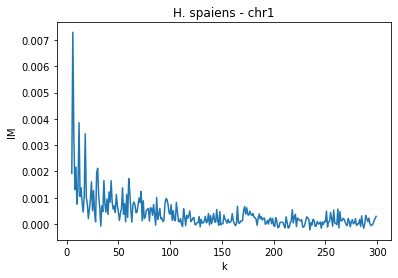

In [46]:
plt.plot(range(len(I))[5:], I[5:])
plt.xlabel('k')
plt.ylabel('IM')
plt.title('H. spaiens - chr1')

## Sklearn

In [12]:
I = []
    K = 300
T = int(len(chr1)/2)
for k in range(K):
    #C, X, Y = genera_conjuntos(chr1, k, T)
    X, Y = ventana(chr[500], chr1, k )
    print("k {} : im {}".format(k, im))
    I.append(adjusted_mutual_info_score(X,Y))

k 0 : im 0.00031886276786896595
k 1 : im 0.00031886276786896595
k 2 : im 0.00031886276786896595
k 3 : im 0.00031886276786896595
k 4 : im 0.00031886276786896595
k 5 : im 0.00031886276786896595
k 6 : im 0.00031886276786896595
k 7 : im 0.00031886276786896595
k 8 : im 0.00031886276786896595
k 9 : im 0.00031886276786896595
k 10 : im 0.00031886276786896595
k 11 : im 0.00031886276786896595
k 12 : im 0.00031886276786896595
k 13 : im 0.00031886276786896595
k 14 : im 0.00031886276786896595
k 15 : im 0.00031886276786896595
k 16 : im 0.00031886276786896595
k 17 : im 0.00031886276786896595
k 18 : im 0.00031886276786896595
k 19 : im 0.00031886276786896595
k 20 : im 0.00031886276786896595
k 21 : im 0.00031886276786896595
k 22 : im 0.00031886276786896595
k 23 : im 0.00031886276786896595
k 24 : im 0.00031886276786896595
k 25 : im 0.00031886276786896595
k 26 : im 0.00031886276786896595
k 27 : im 0.00031886276786896595
k 28 : im 0.00031886276786896595
k 29 : im 0.00031886276786896595
k 30 : im 0.00031886

k 255 : im 0.00031886276786896595
k 256 : im 0.00031886276786896595
k 257 : im 0.00031886276786896595
k 258 : im 0.00031886276786896595
k 259 : im 0.00031886276786896595
k 260 : im 0.00031886276786896595
k 261 : im 0.00031886276786896595
k 262 : im 0.00031886276786896595
k 263 : im 0.00031886276786896595
k 264 : im 0.00031886276786896595
k 265 : im 0.00031886276786896595
k 266 : im 0.00031886276786896595
k 267 : im 0.00031886276786896595
k 268 : im 0.00031886276786896595
k 269 : im 0.00031886276786896595
k 270 : im 0.00031886276786896595
k 271 : im 0.00031886276786896595
k 272 : im 0.00031886276786896595
k 273 : im 0.00031886276786896595
k 274 : im 0.00031886276786896595
k 275 : im 0.00031886276786896595
k 276 : im 0.00031886276786896595
k 277 : im 0.00031886276786896595
k 278 : im 0.00031886276786896595
k 279 : im 0.00031886276786896595
k 280 : im 0.00031886276786896595
k 281 : im 0.00031886276786896595
k 282 : im 0.00031886276786896595
k 283 : im 0.00031886276786896595
k 284 : im 0.0

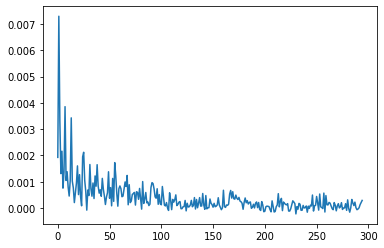

In [13]:
plt.plot(I[5:])

### E. coli

In [28]:
!ls secuencias/*_nt.fasta

secuencias/Arabidopsis_thaliana_nt.fasta
secuencias/Escherichia_coli_nt.fasta
secuencias/Homo_sapiens_nt.fasta
secuencias/M_musculus_nt.fasta
secuencias/Saccharomyces_cerevisiae_nt.fasta
secuencias/Thermus_thermophilus_nt.fasta


In [27]:
def lee_fasta(archivo, simb='>'):
    lineas = []
    with open(archivo, 'r') as f:
        for r in f:
            if(r[0]!=simb):
                lineas.append(r.strip())
    return lineas 



In [30]:
E_coli = ''.join(lee_fasta('secuencias/Escherichia_coli_nt.fasta'))

In [48]:
len(E_coli)

4089513

In [51]:
def info_mutua_ks(sec, K=300, base=4):
    I = []
    T = int(2*len(sec)/3)  #2/3 de sec original
    for i,k in enumerate(range(K)):
        im = mi(sec, k, base, T)
        if(i%100==0):
            print(f"pos {i}")
        #print("k {} : im {}".format(k, im))
        I.append(im)
    return I

In [44]:
im_ecoli = info_mutua_ks(E_coli[:100000])

pos 0


In [45]:
len(im_ecoli)

300

Text(0.5, 1.0, 'E. coli')

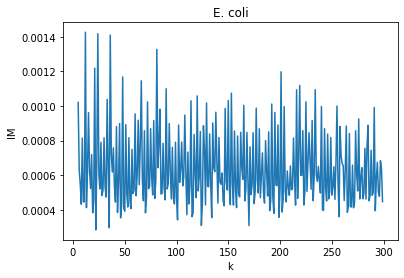

In [47]:
plt.plot(range(len(im_ecoli))[5:], im_ecoli[5:])
plt.xlabel('k')
plt.ylabel('IM')
plt.title('E. coli')

### T. thermophilus


In [49]:
T_thermophilus = ''.join(lee_fasta('secuencias/Thermus_thermophilus_nt.fasta'))
len(T_thermophilus)

1744827

In [50]:
im_ttermo = info_mutua_ks(T_thermophilus[:100000])

pos 0


Text(0.5, 1.0, 'T. thermophilus')

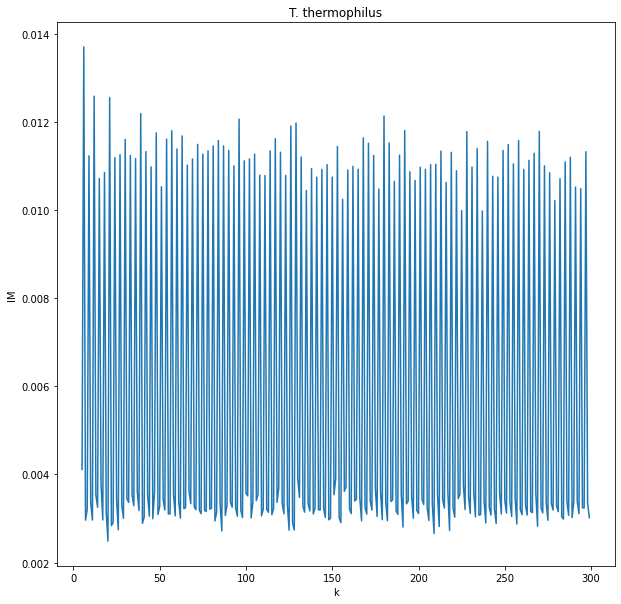

In [57]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(len(im_ttermo))[5:], im_ttermo[5:])
plt.xlabel('k')
plt.ylabel('IM')
plt.title('T. thermophilus')

### A. thaliana

In [53]:
A_thaliana = ''.join(lee_fasta('secuencias/Arabidopsis_thaliana_nt.fasta'))
len(A_thaliana)

16806804

In [54]:
im_athaliana = info_mutua_ks(A_thaliana[:100000])

pos 0
pos 100
pos 200


Text(0.5, 1.0, 'A. thaliana')

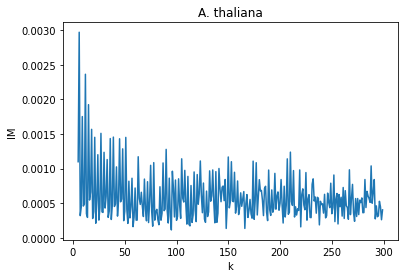

In [55]:
plt.plot(range(len(im_athaliana))[5:], im_athaliana[5:])
plt.xlabel('k')
plt.ylabel('IM')
plt.title('A. thaliana')

### M. musculus


In [58]:
M_musculus = ''.join(lee_fasta('secuencias/M_musculus_nt.fasta'))

In [59]:
len(M_musculus)

205547

In [62]:
im_mmusculus = info_mutua_ks(M_musculus[:100000])

pos 0
pos 100
pos 200


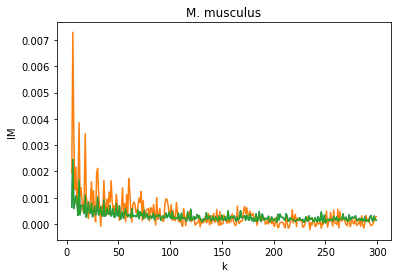

In [66]:
plt.plot(range(len(im_mmusculus))[5:], im_mmusculus[5:])
plt.xlabel('k')
plt.ylabel('IM')
plt.title('M. musculus')
plt.plot(range(len(I))[5:], I[5:])
plt.plot(range(len(im_athaliana))[5:], im_athaliana[5:])
